In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### <div class='alert alert-block alert-info'>City Info</div>

In [4]:
city_info_df = pd.read_csv('Data/city_info.csv')
city_info_df.shape

(366, 9)

In [5]:
city_info_df.head()

,city_cn,city,city_id,province_cn,province,tier,lat,lng,population
0,北京市,Beijing,110000,北京市,Beijing,Tier 1,39.910925,116.413384,2153.60
1,天津市,Tianjin,120000,天津市,Tianjin,new Tier 1,39.093668,117.209523,1561.83
2,石家庄市,Shijiazhuang,130100,河北省,Hebei,Tier 2,38.048312,114.521532,1039.42
3,唐山市,Tangshan,130200,河北省,Hebei,Tier 3,39.636584,118.186459,796.40
4,秦皇岛市,Qinhuangdao,130300,河北省,Hebei,Tier 3,39.941748,119.608531,314.63


In [6]:
todo_cities = city_info_df['city_cn'].tolist()
len(todo_cities)

366

### <div class='info-circle alert alert-block alert-info'>Human Mobility Info</div>
- human flow from one city to another
- aggregated from 2020-01-01 to 2020-01-23 (date format: YYYY-MM-DD)

In [7]:
adj_df = pd.read_csv('Data/human_flow_matrix.csv', index_col=0)
adj_df.shape

(366, 366)

In [8]:
adj_df.head()

,北京市,天津市,石家庄市,唐山市,秦皇岛市,邯郸市,邢台市,保定市,张家口市,承德市,沧州市,廊坊市,衡水市,太原市,大同市,阳泉市,长治市,晋城市,朔州市,晋中市,运城市,忻州市,临汾市,吕梁市,呼和浩特市,包头市,乌海市,赤峰市,通辽市,鄂尔多斯市,呼伦贝尔市,巴彦淖尔市,乌兰察布市,兴安盟,锡林郭勒盟,阿拉善盟,沈阳市,大连市,鞍山市,抚顺市,本溪市,丹东市,锦州市,营口市,阜新市,辽阳市,盘锦市,铁岭市,朝阳市,葫芦岛市,长春市,吉林市,四平市,辽源市,通化市,白山市,松原市,白城市,延边朝鲜族自治州,哈尔滨市,齐齐哈尔市,鸡西市,鹤岗市,双鸭山市,大庆市,伊春市,佳木斯市,七台河市,牡丹江市,黑河市,绥化市,大兴安岭地区,上海市,南京市,无锡市,徐州市,常州市,苏州市,南通市,连云港市,淮安市,盐城市,扬州市,镇江市,泰州市,宿迁市,杭州市,宁波市,温州市,嘉兴市,湖州市,绍兴市,金华市,衢州市,舟山市,台州市,丽水市,合肥市,芜湖市,蚌埠市,淮南市,马鞍山市,淮北市,铜陵市,安庆市,黄山市,滁州市,阜阳市,宿州市,六安市,亳州市,池州市,宣城市,福州市,厦门市,莆田市,三明市,泉州市,漳州市,南平市,龙岩市,宁德市,南昌市,景德镇市,萍乡市,九江市,新余市,鹰潭市,赣州市,吉安市,宜春市,抚州市,上饶市,济南市,青岛市,淄博市,枣庄市,东营市,烟台市,潍坊市,济宁市,泰安市,威海市,日照市,临沂市,德州市,聊城市,滨州市,菏泽市,郑州市,开封市,洛阳市,平顶山市,安阳市,鹤壁市,新乡市,焦作市,濮阳市,许昌市,漯河市,三门峡市,南阳市,商丘市,信阳市,周口市,驻马店市,济源市,武汉市,黄石市,十堰市,宜昌市,襄阳市,鄂州市,荆门市,孝感市,荆州市,黄冈市,咸宁市,随州市,恩施土家族苗族自治州,仙桃市,潜江市,天门市,神农架林区,长沙市,株洲市,湘潭市,衡阳市,邵阳市,岳阳市,常德市,张家界市,益阳市,郴州市,永州市,怀化市,娄底市,湘西土家族苗族自治州,广州市,韶关市,深圳市,珠海市,汕头市,佛山市,江门市,湛江市,茂名市,肇庆市,惠州市,梅州市,汕尾市,河源市,阳江市,清远市,东莞市,中山市,潮州市,揭阳市,云浮市,南宁市,柳州市,桂林市,梧州市,北海市,防城港市,钦州市,贵港市,玉林市,百色市,贺州市,河池市,来宾市,崇左市,海口市,三亚市,三沙市,儋州市,五指山市,琼海市,文昌市,万宁市,东方市,定安县,屯昌县,澄迈县,临高县,白沙黎族自治县,昌江黎族自治县,乐东黎族自治县,陵水黎族自治县,保亭黎族苗族自治县,琼中黎族苗族自治县,重庆市,成都市,自贡市,攀枝花市,泸州市,德阳市,绵阳市,广元市,遂宁市,内江市,乐山市,南充市,眉山市,宜宾市,广安市,达州市,雅安市,巴中市,资阳市,阿坝藏族羌族自治州,甘孜藏族自治州,凉山彝族自治州,贵阳市,六盘水市,遵义市,安顺市,毕节市,铜仁市,黔西南布依族苗族自治州,黔东南苗族侗族自治州,黔南布依族苗族自治州,昆明市,曲靖市,玉溪市,保山市,昭通市,丽江市,普洱市,临沧市,楚雄彝族自治州,红河哈尼族彝族自治州,文山壮族苗族自治州,西双版纳傣族自治州,大理白族自治州,德宏傣族景颇族自治州,怒江傈僳族自治州,迪庆藏族自治州,拉萨市,日喀则市,昌都市,林芝市,山南市,那曲市,阿里地区,西安市,铜川市,宝鸡市,咸阳市,渭南市,延安市,汉中市,榆林市,安康市,商洛市,兰州市,嘉峪关市,金昌市,白银市,天水市,武威市,张掖市,平凉市,酒泉市,庆阳市,定西市,陇南市,临夏回族自治州,甘南藏族自治州,西宁市,海东市,海北藏族自治州,黄南藏族自治州,海南藏族自治州,果洛藏族自治州,玉树藏族自治州,海西蒙古族藏族自治州,银川市,石嘴山市,吴忠市,固原市,中卫市,乌鲁木齐市,克拉玛依市,吐鲁番市,哈密市,昌吉回族自治州,博尔塔拉蒙古自治州,巴音郭楞蒙古自治州,阿克苏地区,克孜勒苏柯尔克孜自治州,喀什地区,和田地区,伊犁哈萨克自治州,塔城地区,阿勒泰地区,石河子市,阿拉尔市,图木舒克市,五家渠市,北屯市,铁门关市,双河市,可克达拉市,昆玉市
北京市,0.000000,1687.284543,717.929685,578.260399,236.565889,860.003982,498.935097,2435.282618,1186.747992,772.985012,556.446942,3856.471127,462.640544,284.940949,228.703321,56.626593,98.873823,47.926838,62.636306,112.898331,227.429424,106.305882,239.295704,91.076712,201.793026,103.064098,13.846133,242.268505,92.540991,57.719109,50.519730,36.805937,94.644533,30.024863,64.297822,7.825447,266.754603,161.200736,69.453745,40.222041,25.647730,46.409431,87.709110,49.760114,46.459197,27.530344,39.778371,38.943228,97.503146,111.686034,218.039124,93.016335,58.454078,23.042493,41.921958,19.823024,45.053625,29.092305,31.040163,385.224723,93.436602,27.096234,16.562578,21.907652,61.674696,21.396012,50.098066,10.313575,60.844025,21.568651,82.911343,5.380662,515.850627,200.173029,59.250838,105.094389,48.053062,108.204900,79.333539,39.763866,31.451816,54.874255,56.047014,23.960738,41.695641,33.532751,187.511206,52.422659,55.793729,32.436636,15.542331,23.928753,30.462165,12.244635,8.144937,27.325203,8.138529,168.313427,93.576963,28.626899,21.533005,57.166950,19.697372,20.141506,106.835890,15.345293,24.611607,132.134287,56.456832,37.663818,52.038299,27.573201,13.027200,70.441119,87.009694,36.539951,13.873429,37.222540,13.513474,16.940520,14.929918,13.755336,106.041605,11.748058,10.160599,49.470566,6.475570,7.070942,33.814735,37.271662,28.400235,27.053921,27.949803,291.399994,210.116605,80.254085,63.408408,53.998601,135.588242,143.430690,169.159620,155.531300,59.663518,39.055949,130.041904,293.389870,234.675291,78.703713,289.842198,344.604706,77.401325,111.931285,65.493794,192.160985,40.115797,97.928273,53.591049,171.971205,73.883939,40.110599,34.324435,190.754348,179.836707,314.979774,363.222841,229.763140,9.356711,213.943016,20.768958,38.902806,40.559683,61.228033,6.451960,22.657543,64.462821,41.163964,67.237587,22.510855,40.840956,19.188407,12.178825,6.440978,10.016563,0.238153,164.802627,29.818382,15.259259,28.735884,24.736431,38.541040,36.966508,11.978901,17.626012,14.205404,13.175405,17.090933,20.785599,10.678127,227.220288,4.547294,221.173438,51.746135,11.321235,33.959445,8.093168,16.318285,5.690368,4.968361,18.398222,3.844330,2.344491,2.587624,4.278031,5.300496,29.527148,14.686257,3.456797,4.837953,1.472979,58.675670,14.994231,35.963769,4.611463,20.812586

### <div class="alert alert-block alert-success"> Mobility Network Plot</div>
* mobility heatmap between cities

In [9]:
# cities in the same province are located in the same block

todo_df = city_info_df[city_info_df['city_cn'].notnull()]
todo_df.shape

todo_df['number'] = range(len(todo_df))

province_label_loc_df = todo_df.groupby(['province'])['number'].agg(list).reset_index()
province_label_loc_df['cnt'] = province_label_loc_df['number'].map(len)
province_label_loc_df['loc'] = province_label_loc_df['number'].map(np.mean)

province_label_loc_df['tick_locs'] = province_label_loc_df['number'].map(lambda x: [np.min(x), np.max(x)])
province_label_loc_df.sort_values(['loc'], ascending=True, inplace=True)
province_label_loc_df.reset_index(drop=True, inplace=True)

province_label_loc_df.shape

(31, 5)

In [10]:
province_label_loc_df.head()

,province,number,cnt,loc,tick_locs
0,Beijing,[0],1,0.0,"[0, 0]"
1,Tianjin,[1],1,1.0,"[1, 1]"
2,Hebei,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",11,7.0,"[2, 12]"
3,Shanxi,"[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]",11,18.0,"[13, 23]"
4,Neimenggu,"[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]",12,29.5,"[24, 35]"


In [11]:
plot_df = adj_df.copy()

# log transformation
for col in plot_df.columns:
    plot_df[col] = plot_df[col].map(lambda x: np.log(x+1), na_action='ignore')

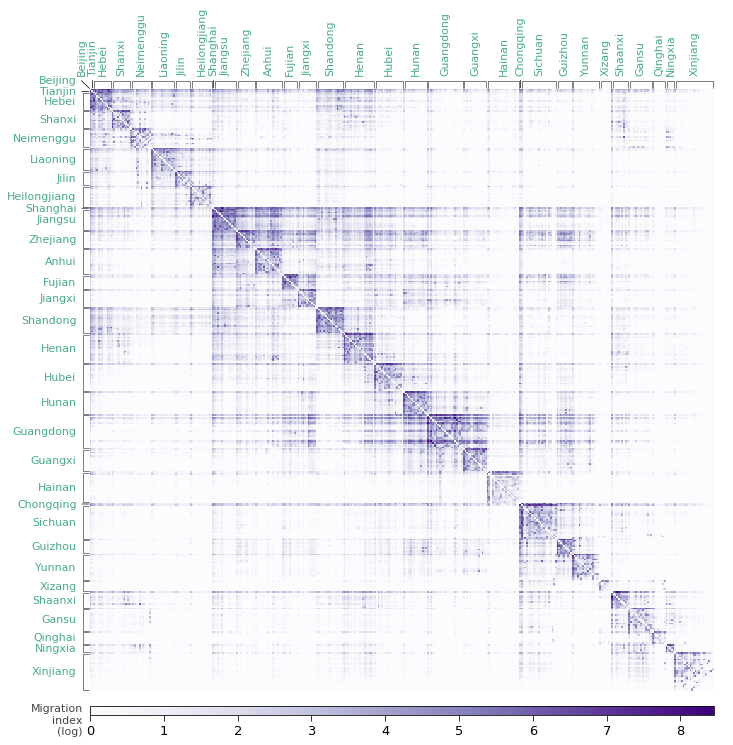

In [12]:

# Define two rows for subplots
fig, (ax, cax) = plt.subplots(nrows=2, figsize=(10, 10.15),  
                              gridspec_kw={"height_ratios":[10, 0.15]})

# horizontal space between axes
# fig.subplots_adjust(hspace=5)

sns.heatmap(plot_df, 
                 cmap="Purples",
                 cbar=False,
                 ax=ax,
                )

ax.set_xlabel('')
# ax.set_xticklabels([])
ax.set_ylabel('')

ax.xaxis.set_ticks_position('top') # the rest is the same

text_color = '#46ac88'

# xaxis
for i in range(len(province_label_loc_df)):
    row = province_label_loc_df.iloc[i]
    
    if row['cnt'] == 1: # annotate municipalities: 直轄市
        if row['province'] == 'Beijing':
            continue

        ann = ax.annotate('', xy=(row['tick_locs'][0]+0.5, .5), xycoords='data',
                      xytext=(row['tick_locs'][1]+0.5, -6.5), textcoords='data',
                      clip_on=False,
                      arrowprops=dict(arrowstyle="-", lw=.7, ec="k",)
                         )
        
    else: # annotate province: 省
    
        frac = 5./(row['cnt']-1)

        ann = ax.annotate('', xy=(row['tick_locs'][0]+0.5, 0.5), xycoords='data',
                      xytext=(row['tick_locs'][1]+0.5, 0.5), textcoords='data',
                      clip_on=False,
                      arrowprops=dict(arrowstyle="-", lw=.5,
                                      connectionstyle=f"bar,fraction={frac}",
    #                                   connectionstyle=f"bar,armA=10",
                                      ec="k",
                        ))

    ann = ax.text(x=row['loc']+0.5, y=-8, s=row['province'], horizontalalignment='center', verticalalignment='bottom', 
        fontdict={'color':text_color, 'size':11,},
        zorder=10,
        rotation='90'
       )

    

# yaxis
for i in range(len(province_label_loc_df)):
    row = province_label_loc_df.iloc[i]
    
    if row['cnt'] == 1: # annotate municipalities: 直轄市
        if row['province'] == 'Beijing':
            continue

        ann = ax.annotate('', xy=(.5, row['tick_locs'][0]+0.5), xycoords='data',
                      xytext=(-6, row['tick_locs'][1]+0.5), textcoords='data',
                      clip_on=False,
                      arrowprops=dict(arrowstyle="-", lw=.7, ec="k",)
                         )
        
    else: # annotate province: 省
    
        frac = -5./(row['cnt']-1)

        ann = ax.annotate('', xy=(0.5, row['tick_locs'][0]+0.5), xycoords='data',
                      xytext=(0.5, row['tick_locs'][1]+0.5), textcoords='data',
                      clip_on=False,
                      arrowprops=dict(arrowstyle="-", lw=.5,
                                      connectionstyle=f"bar,fraction={frac}",
                                      # connectionstyle=f"bar,armA=10",
                                      ec="k",
                        ))

    ann = ax.text(x=-8, y=row['loc']+0.5, s=row['province'], horizontalalignment='right', verticalalignment='center', 
        fontdict={'color':text_color, 'size':11,},
        zorder=10,
        rotation='0'
       )
    
    
    
# Beijing: special
ann = ax.annotate('', xy=(0.5, 0.5), xycoords='data',
              xytext=(-6, -6), textcoords='data',
              clip_on=False,
              arrowprops=dict(arrowstyle="-",
                              lw=.7, ec="k",
                ))

ax.text(x=-5, y=-8, s='Beijing', horizontalalignment='center', verticalalignment='bottom', 
        fontdict={'color':text_color, 'size':11,},
        zorder=10,
        rotation='90'
       )


ax.text(x=-8, y=-5.5, s='Beijing', horizontalalignment='right', verticalalignment='center', 
        fontdict={'color':text_color, 'size':11,},
        zorder=10,
        rotation='0'
       )

ax.set_axis_off()


# colorbar
fig.colorbar(ax.get_children()[0], cax=cax, orientation="horizontal")
cax.tick_params(axis='both', which='major', top=False, right=False, length=6, width=.8, labelsize=13, pad=4, direction='out')
# cax.set_xlabel('Migration index (log)', fontsize=13)
cax.text(x=-0.1, y=-5, s='Migration\nindex\n(log)', horizontalalignment='right', verticalalignment='center', 
        fontdict={'color':'#444444', 'size':11,})


plt.tight_layout(pad=0.1)

plt.subplots_adjust(hspace = 0.05)

out_dir = 'Outputs'
# plt.savefig(os.path.join(out_dir, 'fig1-mobility_heatmap.pdf'), pad_inches=0, bbox_inches='tight')

# plt.show()

### <div class="alert alert-block alert-success"> Wuhan Outlofw Plot</div>
* Outflow index of Wuhan in January 2020 and the corresponding period in 2019, aligned by the Lunar New Year
* The Lunar New Year is 2020-01-25 in 2020 and 2019-02-05 in 2019

In [13]:
file_path = os.path.join('Data/outflow_data', 'outflow_Wuhan.csv')
city_flow_df = pd.read_csv(file_path)

city_flow_df['date'] = city_flow_df['date'].astype(str)
city_flow_df.shape

(166, 2)

In [14]:
city_flow_df.head()

,date,migration_index
0,20190112,5.052067
1,20190113,4.058813
2,20190114,4.004834
3,20190115,3.724672
4,20190116,3.990384


In [15]:
date2index = city_flow_df.set_index('date')['migration_index'].to_dict()
# date2index

In [16]:
# map 2020 date to 2019 date in Lunar calendar

date_dic = {}
for i, d20 in enumerate(pd.date_range('20200101', '20200315')):
    # print(i, d20.date())
    d19 = pd.to_datetime('20190112')+pd.Timedelta(days=i)
    d19 = str(d19.date()).replace('-', '')
    d20 = str(d20.date()).replace('-', '')
    # print(d20, ' -> ', d19)
    
    date_dic[d20] = d19

In [17]:
date_dic['20200125']

'20190205'

In [18]:
flow_df = pd.DataFrame(list(date_dic.items()), columns=['date2020', 'date2019'])
flow_df['migration_index_2020'] = flow_df['date2020'].map(date2index)
flow_df['migration_index_2019'] = flow_df['date2019'].map(date2index)

# pd.to_datetime('20200101').strftime('%b %d')
flow_df['date2020_str'] = flow_df['date2020'].map(lambda x: pd.to_datetime(x).strftime('%b %d'))

flow_df.head()

,date2020,date2019,migration_index_2020,migration_index_2019,date2020_str
0,20200101,20190112,3.455298,5.052067,Jan 01
1,20200102,20190113,3.524602,4.058813,Jan 02
2,20200103,20190114,5.524427,4.004834,Jan 03
3,20200104,20190115,6.099818,3.724672,Jan 04
4,20200105,20190116,5.322478,3.990384,Jan 05


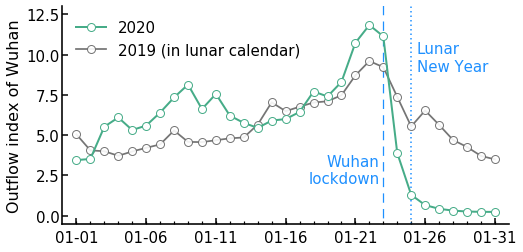

In [19]:

plot_df = flow_df.copy()
plot_df = plot_df[plot_df['date2020'].str.contains('202001')]

fig, ax = plt.subplots(figsize=(8, 4))

# ax.patch.set_alpha(0.015)
# ax.set_facecolor('#2b3679')


text_color = '#46ac88'


# 2020
# ---------------------
x = plot_df['date2020']
y = plot_df['migration_index_2020']

ax.plot(x, y, '-o', 
        color=text_color, 
        linewidth=2, 
        markersize=8,
        clip_on=False, 
        markeredgecolor=text_color, 
        markeredgewidth=1,
        markerfacecolor='w',
        label='2020', 
#         alpha=0.9,
        zorder=100,
       )


# 2019
# ---------------------
x = plot_df['date2020']
y = plot_df['migration_index_2019']

ax.plot(x, y, '-o', 
        color='#666666', 
        linewidth=1.75, 
        markersize=8,
        clip_on=False, 
        # markeredgecolor='slategrey', 
        markeredgecolor='#666666', 
        markeredgewidth=1,
        markerfacecolor='w',
        label='2019 (in lunar calendar)', 
        alpha=0.9,
        zorder=90,
       )



line_style = (0, (7.5, 5))
ax.vlines(x=list(x).index('20200123'), ymin=-5, ymax=50, linestyles=line_style, linewidth=1.25, color='dodgerblue')
ax.text(x=list(x).index('20200123')-0.25, y=2, s='Wuhan\nlockdown', fontsize=15, ha='right', color='dodgerblue')

line_style = (0, (1, 2))
ax.vlines(x=list(x).index('20200125'), ymin=-5, ymax=50, linestyles=line_style, linewidth=1.5, color='dodgerblue')
ax.text(x=list(x).index('20200125')+0.4, y=9, s='Lunar\nNew Year', fontsize=15, ha='left', color='dodgerblue')


N = len(x)

every_nth = 1
locs = range(0, N, every_nth)
ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))

every_nth = 5
locs = range(0, N, every_nth)
ax.xaxis.set_major_locator(ticker.FixedLocator(locs))


locs = range(0, 200, 25)
locs = [i/10.0 for i in locs]
ax.yaxis.set_major_locator(ticker.FixedLocator(locs))


ticks = list(x)
ticks = list(x.str[-4:])
# ticks.insert(0, '')
ticks.append('0316')
ticks = [t[:2]+'-'+t[-2:] for t in ticks]
# string date
# ticks = list(plot_df['date2020_str'])
# ticks.append(pd.to_datetime('20200316').strftime('%b %d'))
plt.xticks(list(range(0, N+1, every_nth)), ticks[::every_nth], 
           rotation='0', 
           horizontalalignment='center',
           # va = 'center',
           position=(0, 0)
           # rotation_mode="anchor"
          )


real_legend = plt.legend(numpoints=1, fontsize=15, frameon=False, loc='best')


# ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Outflow index of Wuhan', fontsize=16)

border_width = 1.6
ax.spines['bottom'].set_linewidth(border_width)
ax.spines['left'].set_linewidth(border_width)
ax.spines['top'].set_linewidth(border_width)
ax.spines['right'].set_linewidth(border_width)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# # custom ticks
ax.tick_params(axis='x', which='major', top=False, right=False, pad=6, labelsize=15, length=6, width=1.5, direction='in')
ax.tick_params(axis='y', which='major', top=False, right=False, pad=3, labelsize=15, length=6, width=1.5, direction='in')
ax.tick_params(axis='both', which='minor', top=False, right=False, length=3.5,  width=1.2, direction='in')


plt.xlim(-1, list(x).index('20200131')+1)
plt.ylim(-.5, 13)


# plt.tight_layout(pad=0.1)
out_dir = 'Outputs'
# plt.savefig(os.path.join(out_dir, 'fig1-Wuhan_outflow.pdf'), pad_inches=0, bbox_inches='tight')
